<a href="https://colab.research.google.com/github/aspitatoyin/Numpy-and-Pandas/blob/main/Aspita_Oluwatoyin(Employee_Retention_Analysis_and_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/HR_comma_sep 1.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
print(df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [9]:
# Check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [10]:
# Check how many employees left vs stayed
print(df['left'].value_counts())

left
0    11428
1     3571
Name: count, dtype: int64


In [11]:
# Correlation with numerical variables
print(df.corr(numeric_only=True)['left'].sort_values(ascending=False))


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


In [12]:
# Group analysis for salary
print(df.groupby('salary')['left'].mean())

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


In [13]:
# Group analysis for department
print(df.groupby('Department')['left'].mean())

Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64


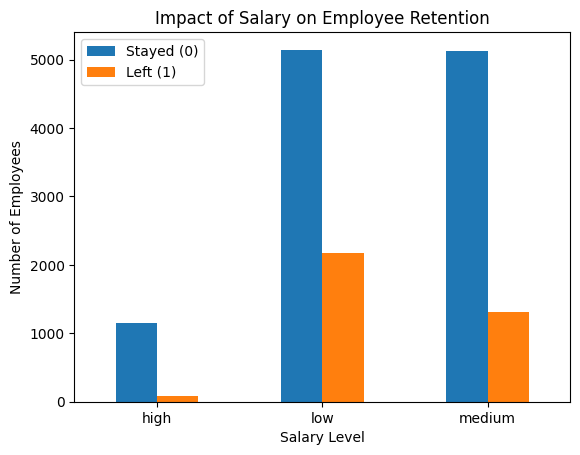

In [14]:
#Plot Bar Chart: Salary vs Retention
salary_retention = df.groupby(['salary', 'left']).size().unstack()

salary_retention.plot(kind='bar')

plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.legend(["Stayed (0)", "Left (1)"])
plt.show()


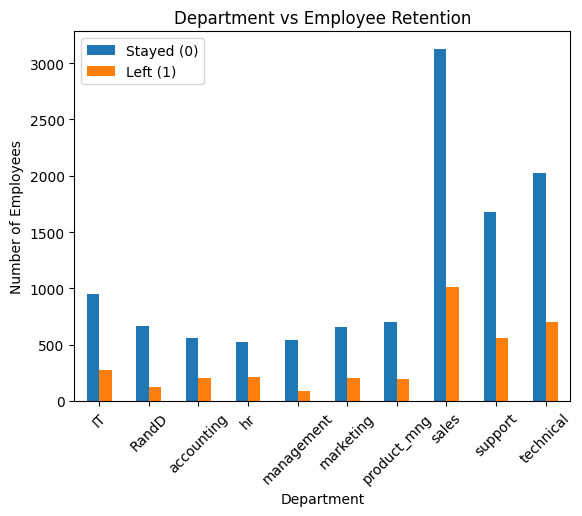

In [15]:
#Plot Bar Chart: Department vs Retention
dept_retention = df.groupby(['Department', 'left']).size().unstack()

dept_retention.plot(kind='bar')

plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(["Stayed (0)", "Left (1)"])
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Select important features
features = [
    'satisfaction_level',
    'average_montly_hours',
    'promotion_last_5years',
    'time_spend_company',
    'number_project'
]

X = df[features]
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


In [21]:
#Measure Model Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.7586666666666667
Confusion Matrix:
[[3151  277]
 [ 809  263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.49      0.25      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

